In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data = pd.read_csv("../data/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
#check if we can null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#remove nulls
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
#split data

from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y= data['median_house_value']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [12]:
train_data= x_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16209,-121.30,37.94,52.0,24.0,6.0,23.0,5.0,2.3750,INLAND,67500.0
14069,-117.12,32.76,33.0,2279.0,591.0,1250.0,576.0,2.4297,NEAR OCEAN,139000.0
13111,-121.37,38.39,15.0,1883.0,254.0,893.0,256.0,6.2575,INLAND,143500.0
9537,-120.79,37.41,35.0,2436.0,466.0,1730.0,469.0,2.2071,INLAND,85900.0
19026,-122.00,38.35,34.0,432.0,65.0,208.0,71.0,5.5435,INLAND,136000.0
...,...,...,...,...,...,...,...,...,...,...
19435,-121.04,37.67,16.0,19.0,19.0,166.0,9.0,0.5360,INLAND,162500.0
18462,-121.77,37.24,12.0,10236.0,1878.0,5674.0,1816.0,4.7470,<1H OCEAN,261100.0
2860,-118.90,35.41,6.0,4656.0,971.0,2320.0,935.0,3.0938,INLAND,100800.0
14563,-117.22,32.82,35.0,756.0,135.0,423.0,136.0,3.5234,NEAR OCEAN,183900.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

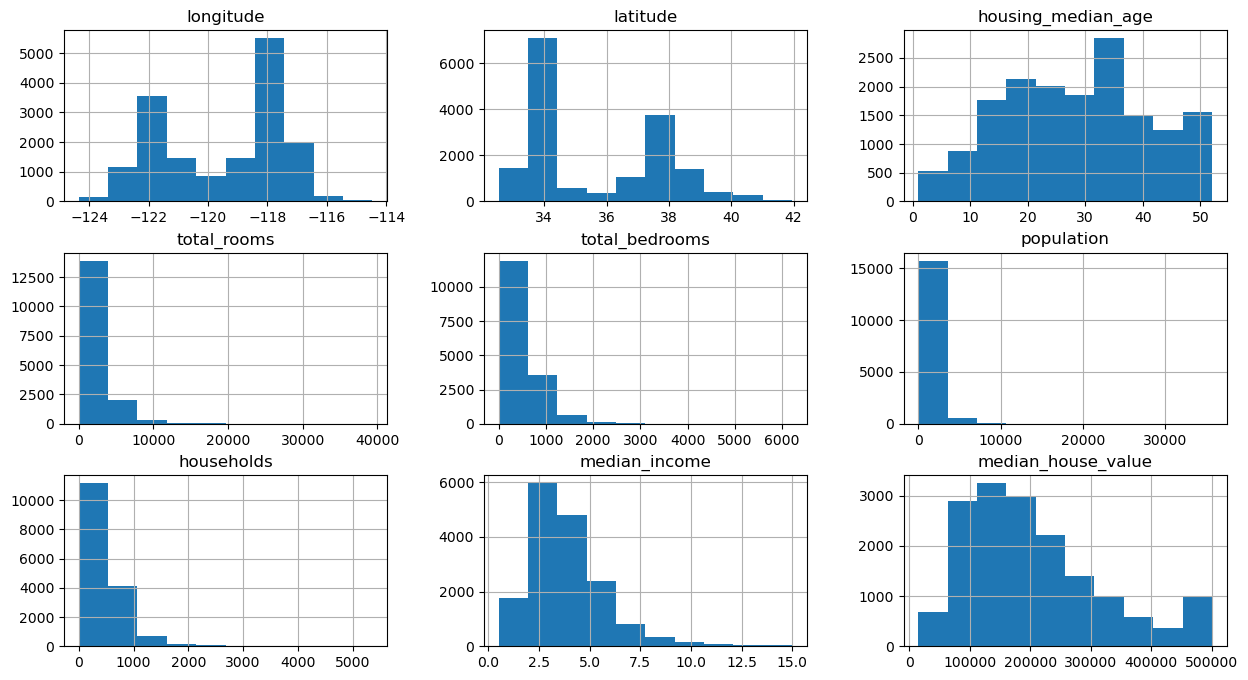

In [14]:
train_data.hist(figsize=(15,8))

<AxesSubplot:>

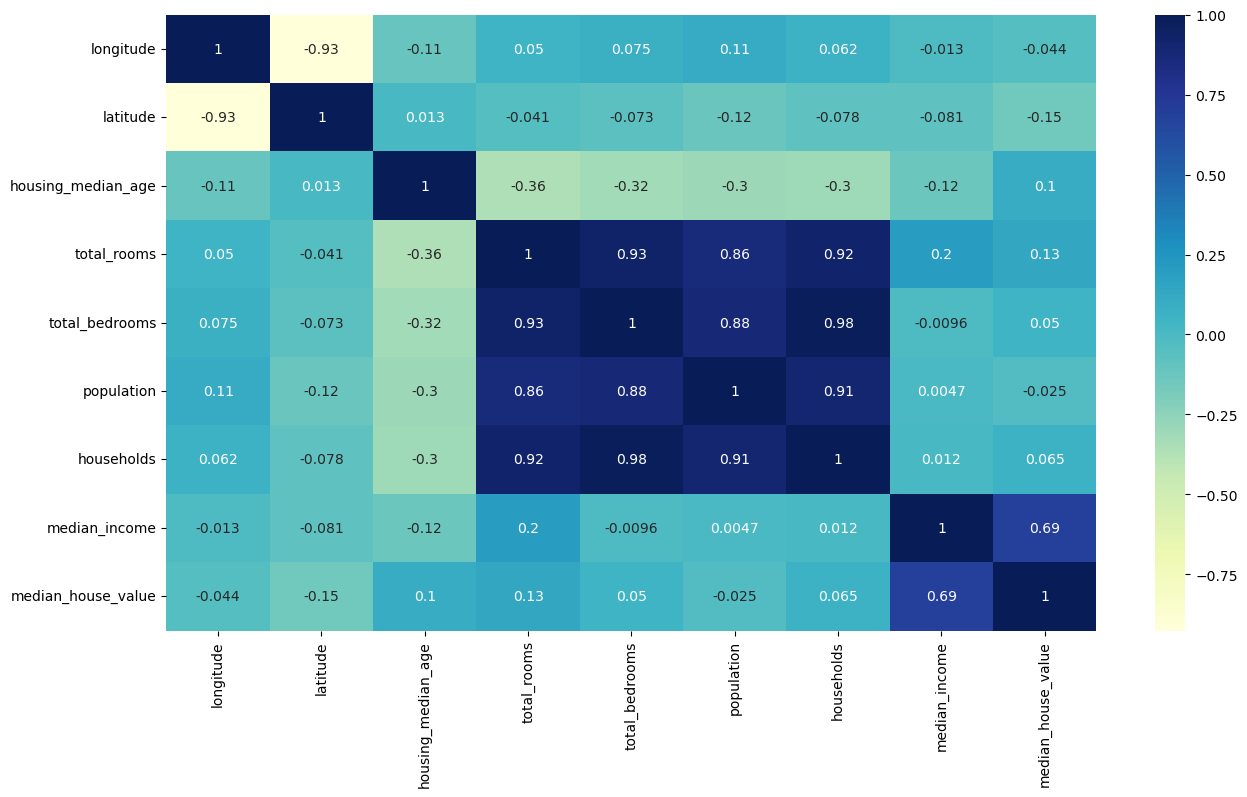

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [18]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

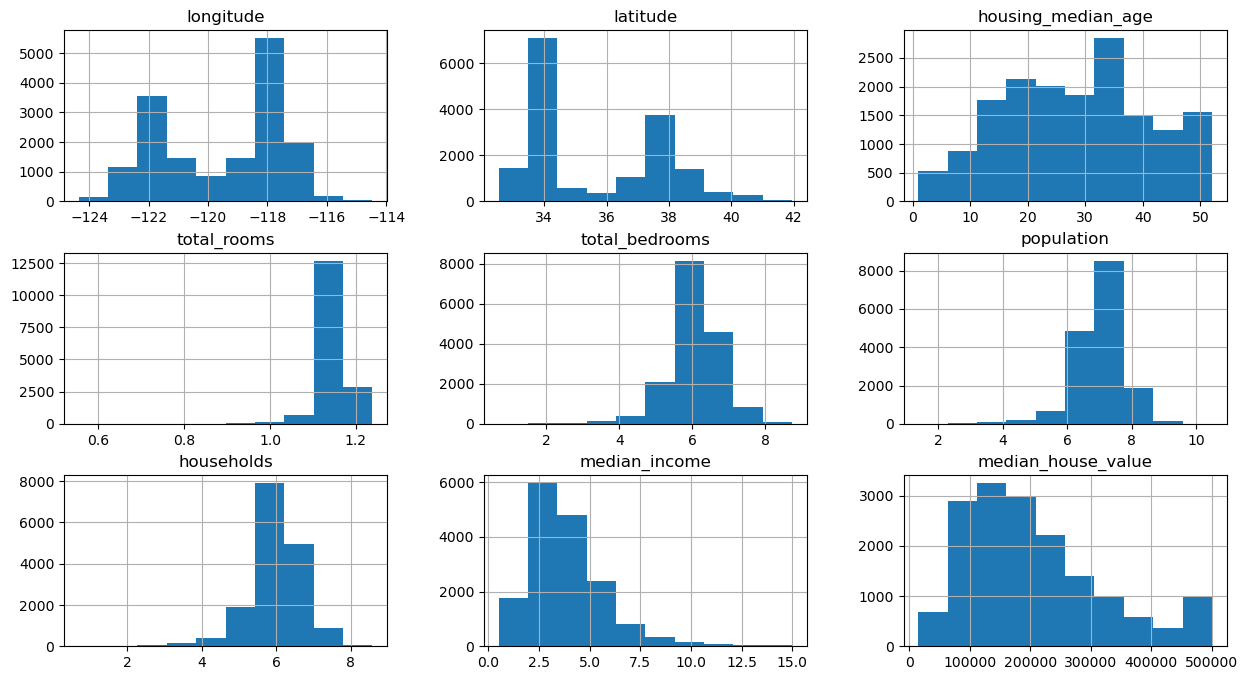

In [19]:
train_data.hist(figsize=(15,8))